In [1]:
setwd("./")
getwd()

library(foreign)
Data <- read.spss("BASE_P02.sav",to.data.frame = TRUE)


[1] "/home/dev/Documents/ESAN/Multivariado I/PC02"

## Analisis Exploratorio

In [2]:
library(dplyr)

attach(Data)

glimpse(Data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Rows: 30,564
Columns: 13
$ CodCli       <dbl> 10549, 10846, 11105, 12477, 13306, 13336, 14341, 14634, 1…
$ DurMes       <dbl> 36.56667, 60.86667, 12.30000, 18.33333, 85.90000, 48.7000…
$ Tasa         <dbl> 13.0, 14.0, 34.0, 15.0, 11.0, 13.0, 36.0, 50.0, 34.0, 13.…
$ NroCuo       <dbl> 36, 58, 12, 18, 84, 48, 36, 12, 12, 12, 24, 18, 24, 24, 1…
$ CuoCan       <dbl> 4, 15, 1, 6, 24, 29, 12, 1, 3, 10, 11, 2, 18, 0, 2, 15, 4…
$ CuoPen       <dbl> 32, 43, 11, 12, 60, 19, 24, 11, 9, 2, 13, 16, 6, 0, 10, 2…
$ CuoVen       <dbl> 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, …
$ DiasMora     <dbl> 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ ImpCuo_Sol   <dbl> 668.98, 2227.13, 733.67, 1179.45, 2398.18, 265.62, 219.39…
$ Desem_Sol    <dbl> 20000, 92700, 7500, 19000, 164305, 10000, 5000, 5000, 750…
$ SalAct_Sol   <dbl> 18135.32, 74123.03, 6960.13, 13117.27, 129047.78, 4552.43…
$ CapPag_Sol   <dbl> 1864.68, 18576.97, 539.87, 5882.73, 35257.22, 5447.57, 11…
$ InterPag_Sol 

In [3]:
head(Data)

,CodCli,DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,Desem_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10549,36.56667,13,36,4,32,0,0,668.98,20000,18135.32,1864.68,811.24
2,10846,60.86667,14,58,15,43,0,0,2227.13,92700,74123.03,18576.97,14829.98
3,11105,12.30000,34,12,1,11,1,0,733.67,7500,6960.13,539.87,193.80
4,12477,18.33333,15,18,6,12,0,0,1179.45,19000,13117.27,5882.73,1193.97
5,13306,85.90000,11,84,24,60,0,0,2398.18,164305,129047.78,35257.22,31891.82
6,13336,48.70000,13,48,29,19,2,48,265.62,10000,4552.43,5447.57,2255.41


In [4]:
datos_perdidos <- colSums(is.na(Data))  |> as.data.frame()
datos_perdidos

,colSums(is.na(Data))
,<dbl>
CodCli,0
DurMes,0
Tasa,0
NroCuo,0
CuoCan,0
CuoPen,0
CuoVen,0
DiasMora,0
ImpCuo_Sol,0


In [5]:
library(knitr)
kable(summary(Data[, -1]))




|   |    DurMes     |     Tasa     |    NroCuo  |    CuoCan     |    CuoPen     |    CuoVen      |   DiasMora     |  ImpCuo_Sol    |  Desem_Sol    |  SalAct_Sol     |  CapPag_Sol     | InterPag_Sol    |
|:--|:--------------|:-------------|:-----------|:--------------|:--------------|:---------------|:---------------|:---------------|:--------------|:----------------|:----------------|:----------------|
|   |Min.   :  1.00 |Min.   : 6.70 |Min.   :  1 |Min.   : 0.000 |Min.   :-10.00 |Min.   : 0.0000 |Min.   :   0.00 |Min.   :    0.0 |Min.   :   900 |Min.   :     0.2 |Min.   :     0.0 |Min.   :     0.0 |
|   |1st Qu.: 12.20 |1st Qu.:33.00 |1st Qu.: 12 |1st Qu.: 2.000 |1st Qu.:  5.00 |1st Qu.: 0.0000 |1st Qu.:   0.00 |1st Qu.:  182.4 |1st Qu.:  2900 |1st Qu.:  1683.2 |1st Qu.:   279.4 |1st Qu.:   188.7 |
|   |Median : 18.20 |Median :47.00 |Median : 18 |Median : 5.000 |Median : 10.00 |Median : 0.0000 |Median :   0.00 |Median :  275.1 |Median :  4000 |Median :  2870.5 |Median :   832.3 |Me

In [6]:
library(ggplot2)
library(tidyr)
library(dplyr)
Data_norm <- as.data.frame(lapply(Data[,-1], function(x) {
  (x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE))
}))

Data_long <- pivot_longer(Data_norm, cols = everything(), names_to = "Variable", values_to = "Valor")




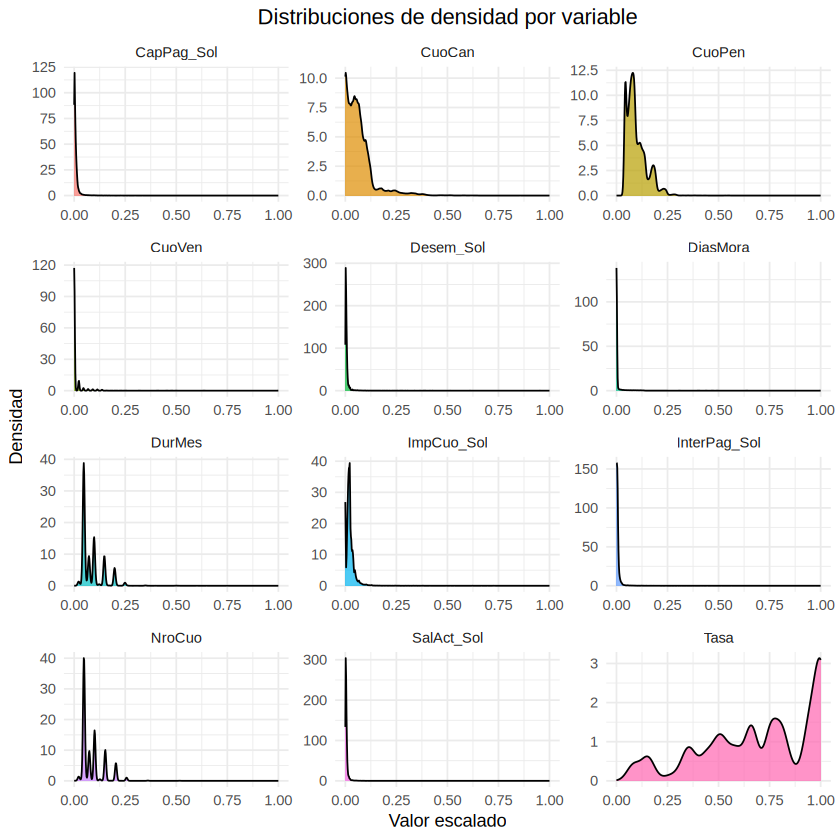

In [7]:
ggplot(Data_long, aes(x = Valor, fill = Variable)) +
  geom_density(alpha = 0.7) + 
  facet_wrap(~ Variable, scales = "free", ncol = 3) +  
  theme_minimal() + 
  labs(title = "Distribuciones de densidad por variable",
       x = "Valor escalado",
       y = "Densidad") +
  theme(legend.position = "none",  
        plot.title = element_text(hjust = 0.5))


In [8]:
Data_scaled <- scale(Data)
Data_scaled <- as.data.frame(Data_scaled)
head(Data_scaled)

,CodCli,DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,Desem_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-3.146124,1.1714598,-2.1127673,1.2035300,-0.30392287,1.68026572,-0.2735320,-0.2200883,0.9072570,1.00263082,1.15467128,0.05447352,0.004163405
2,-3.145728,3.0760976,-2.0433633,2.9685918,1.48178665,2.64207518,-0.2735320,-0.2200883,5.1526634,6.39558311,6.01898504,4.08476200,6.767449719
3,-3.145383,-0.7305652,-0.6552835,-0.7219920,-0.79093456,-0.15591598,0.7018773,-0.2200883,1.0835143,0.07536942,0.18375051,-0.26501390,-0.293718109
4,-3.143556,-0.2576716,-1.9739593,-0.2406115,0.02075159,-0.06847876,-0.2735320,-0.2200883,2.2981068,0.92844991,0.71869399,1.02345507,0.188809997
5,-3.142452,5.0382141,-2.2515753,5.0545740,2.94282171,4.12850799,-0.2735320,-0.2200883,5.6187140,11.70730730,10.79094691,8.10732380,14.998867733
6,-3.142412,2.1224724,-2.1127673,2.1662910,3.75450785,0.54358181,1.6772865,1.5059901,-0.1917561,0.26082170,-0.02543484,0.91851312,0.700897576


In [9]:
library(knitr)
kable(summary(Data_scaled[, -1]))



|   |    DurMes      |     Tasa       |    NroCuo      |    CuoCan      |    CuoPen      |    CuoVen      |   DiasMora     |  ImpCuo_Sol    |  Desem_Sol      |  SalAct_Sol     |  CapPag_Sol     | InterPag_Sol    |
|:--|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:---------------|:----------------|:----------------|:----------------|:----------------|
|   |Min.   :-1.6163 |Min.   :-2.5500 |Min.   :-1.6045 |Min.   :-0.9533 |Min.   :-1.9921 |Min.   :-0.2735 |Min.   :-0.2201 |Min.   :-0.9155 |Min.   :-0.41422 |Min.   :-0.42094 |Min.   :-0.39521 |Min.   :-0.38722 |
|   |1st Qu.:-0.7384 |1st Qu.:-0.7247 |1st Qu.:-0.7220 |1st Qu.:-0.6286 |1st Qu.:-0.6805 |1st Qu.:-0.2735 |1st Qu.:-0.2201 |1st Qu.:-0.4184 |1st Qu.:-0.26586 |1st Qu.:-0.27472 |1st Qu.:-0.32783 |1st Qu.:-0.29618 |
|   |Median :-0.2681 |Median : 0.2470 |Median :-0.2406 |Median :-0.1416 |Median :-0.2434 |Median :-0.2735 |Median :-0.2201 |Median :-0.1659 |M

In [10]:
desv_stnd <- round(apply(Data[,-1], 2, sd), 3 )
desv_stnd_scaled <- round(apply(Data_scaled[,-1], 2, sd), 3 )
desv_stnd <- as.data.frame(desv_stnd) 
desv_stnd$scaled <- desv_stnd_scaled
desv_stnd


,desv_stnd,scaled
,<dbl>,<dbl>
DurMes,12.758,1
Tasa,14.408,1
NroCuo,12.464,1
CuoCan,6.160,1
CuoPen,11.437,1
CuoVen,1.025,1
DiasMora,27.809,1
ImpCuo_Sol,367.020,1
Desem_Sol,13480.557,1


In [11]:
library(ggplot2)
library(reshape2)
corr_matrix <- cor(Data_scaled[,-1])
corr_matrix[lower.tri(corr_matrix)] <- NA
corr_melted <- melt(corr_matrix, na.rm = TRUE)
corr_melted


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




,Var1,Var2,value
,<fct>,<fct>,<dbl>
1,DurMes,DurMes,1.00000000
13,DurMes,Tasa,-0.46704449
14,Tasa,Tasa,1.00000000
25,DurMes,NroCuo,0.99312450
26,Tasa,NroCuo,-0.46617009
27,NroCuo,NroCuo,1.00000000
37,DurMes,CuoCan,0.45200384
38,Tasa,CuoCan,-0.33853782
39,NroCuo,CuoCan,0.45214241


## Multicolinealidad


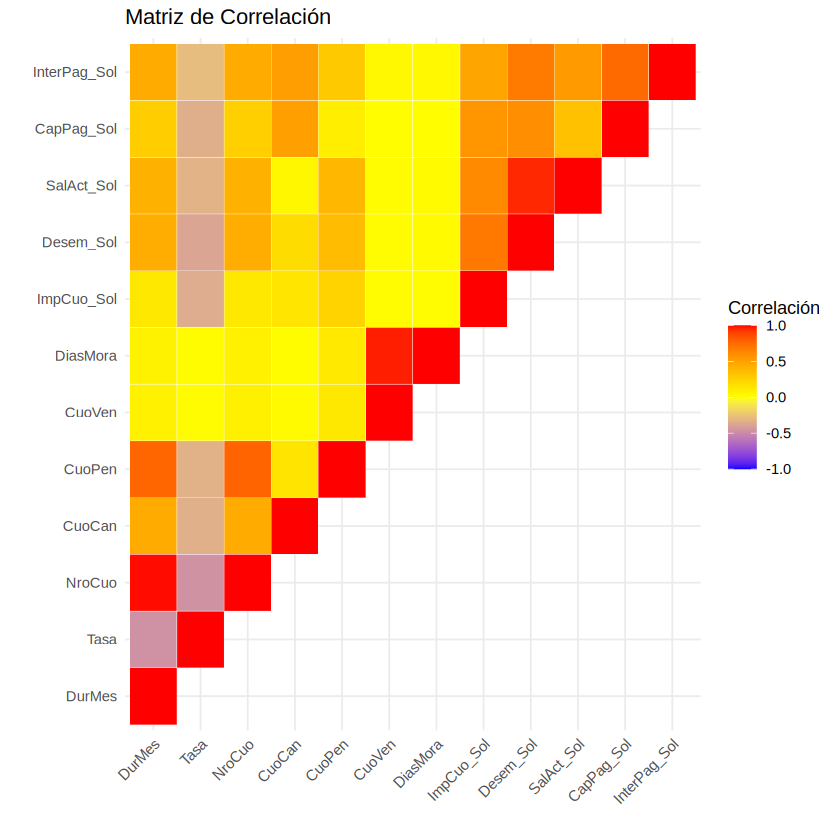

In [12]:

ggplot(corr_melted, aes(Var1, Var2, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "yellow", 
                       midpoint = 0, limit = c(-1, 1), 
                       name = "Correlación") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, 
                                   hjust = 1)) +
  labs(title = "Matriz de Correlación", x = "", y = "")

In [13]:
corr_melted_filtered <- corr_melted %>%
  filter(value > 0.9) %>%
  filter(Var1 != Var2)

corr_melted_filtered

Var1,Var2,value
<fct>,<fct>,<dbl>
DurMes,NroCuo,0.9931245
CuoVen,DiasMora,0.9728110
Desem_Sol,SalAct_Sol,0.9571043



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[1] 2

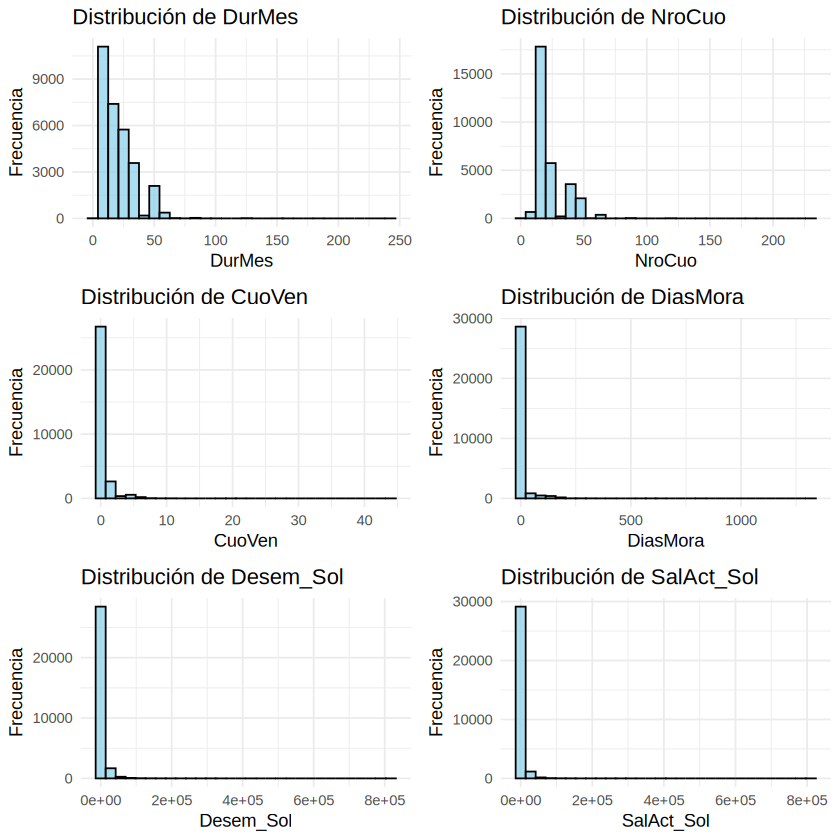

In [14]:
library(gridExtra)

p1 <- ggplot(Data, aes(x = DurMes)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de DurMes", x = "DurMes", y = "Frecuencia") +
  theme_minimal()

p2 <- ggplot(Data, aes(x = NroCuo)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de NroCuo", x = "NroCuo", y = "Frecuencia") +
  theme_minimal()

p3 <- ggplot(Data, aes(x = CuoVen)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de CuoVen", x = "CuoVen", y = "Frecuencia") +
  theme_minimal()

p4 <- ggplot(Data, aes(x = DiasMora)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de DiasMora", x = "DiasMora", y = "Frecuencia") +
  theme_minimal()

p5 <- ggplot(Data, aes(x = Desem_Sol)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de Desem_Sol", x = "Desem_Sol", y = "Frecuencia") +
  theme_minimal()

p6 <- ggplot(Data, aes(x = SalAct_Sol)) + 
  geom_histogram(bins = 30, fill = "skyblue", color = "black", alpha = 0.7) +
  labs(title = "Distribución de SalAct_Sol", x = "SalAct_Sol", y = "Frecuencia") +
  theme_minimal()

grid.arrange(p1, p2, p3, p4, p5, p6, ncol = 2)
2

In [15]:
x <- Data_scaled[, !names(Data_scaled) %in% c("Desem_Sol", "CodCli")]

head(x)


,DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.1714598,-2.1127673,1.2035300,-0.30392287,1.68026572,-0.2735320,-0.2200883,0.9072570,1.15467128,0.05447352,0.004163405
2,3.0760976,-2.0433633,2.9685918,1.48178665,2.64207518,-0.2735320,-0.2200883,5.1526634,6.01898504,4.08476200,6.767449719
3,-0.7305652,-0.6552835,-0.7219920,-0.79093456,-0.15591598,0.7018773,-0.2200883,1.0835143,0.18375051,-0.26501390,-0.293718109
4,-0.2576716,-1.9739593,-0.2406115,0.02075159,-0.06847876,-0.2735320,-0.2200883,2.2981068,0.71869399,1.02345507,0.188809997
5,5.0382141,-2.2515753,5.0545740,2.94282171,4.12850799,-0.2735320,-0.2200883,5.6187140,10.79094691,8.10732380,14.998867733
6,2.1224724,-2.1127673,2.1662910,3.75450785,0.54358181,1.6772865,1.5059901,-0.1917561,-0.02543484,0.91851312,0.700897576


## Analisis Factorial


In [16]:
bartlett.test(Data[,-1])


	Bartlett test of homogeneity of variances

data:  Data[, -1]
Bartlett's K-squared = 2861223, df = 11, p-value < 2.2e-16


In [17]:
library(psych)
KMO(x)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = x)
Overall MSA =  0.68
MSA for each item = 
      DurMes         Tasa       NroCuo       CuoCan       CuoPen       CuoVen 
        0.73         0.89         0.71         0.73         0.79         0.51 
    DiasMora   ImpCuo_Sol   SalAct_Sol   CapPag_Sol InterPag_Sol 
        0.51         0.59         0.64         0.68         0.73 

In [18]:
KMO(Data_scaled[,-1])

Error in solve.default(r) : 
  system is computationally singular: reciprocal condition number = 3.4046e-18


matrix is not invertible, image not found



Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = Data_scaled[, -1])
Overall MSA =  0.5
MSA for each item = 
      DurMes         Tasa       NroCuo       CuoCan       CuoPen       CuoVen 
         0.5          0.5          0.5          0.5          0.5          0.5 
    DiasMora   ImpCuo_Sol    Desem_Sol   SalAct_Sol   CapPag_Sol InterPag_Sol 
         0.5          0.5          0.5          0.5          0.5          0.5 

In [19]:
autocor <- eigen(cor(x))
autocor

eigen() decomposition
$values
 [1] 4.321699619 2.006462856 1.673174188 1.201190651 0.734166084 0.394923835
 [7] 0.334347132 0.189906177 0.110458791 0.026917024 0.006753643

$vectors
             [,1]        [,2]        [,3]         [,4]        [,5]        [,6]
 [1,]  0.40430912  0.09261249 -0.37326033 -0.053695576 -0.08874722  0.07766579
 [2,] -0.29532094  0.07915745  0.04578419 -0.004306865 -0.87963770 -0.19074337
 [3,]  0.40408337  0.09689056 -0.37619879 -0.052769916 -0.08950813  0.07195397
 [4,]  0.27483718 -0.06810775  0.05330627 -0.648744921  0.04547292 -0.02615798
 [5,]  0.33213966  0.15644822 -0.36183001  0.250459708 -0.12267393 -0.54324944
 [6,]  0.05781328  0.66058662  0.23655935 -0.032515293  0.04365230  0.02099075
 [7,]  0.05617541  0.65958526  0.24005680 -0.026035127  0.05082385  0.04405080
 [8,]  0.26157989 -0.14869404  0.42656795  0.385233926  0.15087144 -0.49955559
 [9,]  0.31250156 -0.07272646  0.15075086  0.530107716 -0.14734207  0.57378760
[10,]  0.30606257 -0.1819859

In [20]:
AutoVal <- round(autocor$values,5) %>% as.data.frame()
VarExpFact <- round(autocor$values/sum(autocor$values)*100,5) %>% as.data.frame()
VarExpFactAcum <- round(cumsum(autocor$values/sum(autocor$values)*100),5) %>% as.data.frame()
CantFactor <- cbind(AutoVal,VarExpFact,VarExpFactAcum) %>% as.data.frame()
colnames(CantFactor) <- c("AUTO VALORES","VARIANZA EXPLICADA","VARIANZA ACUMULADA")
CantFactor

AUTO VALORES,VARIANZA EXPLICADA,VARIANZA ACUMULADA
<dbl>,<dbl>,<dbl>
4.32170,39.28818,39.28818
2.00646,18.24057,57.52875
1.67317,15.21067,72.73942
1.20119,10.91992,83.65934
0.73417,6.67424,90.33358
0.39492,3.59022,93.92379
0.33435,3.03952,96.96331
0.18991,1.72642,98.68973
0.11046,1.00417,99.69390


In [21]:
Factorial <- factanal(x,factor = 3,rotation = "varimax",scores = "regression")

Factorial


Call:
factanal(x = x, factors = 3, scores = "regression", rotation = "varimax")

Uniquenesses:
      DurMes         Tasa       NroCuo       CuoCan       CuoPen       CuoVen 
       0.009        0.725        0.005        0.634        0.377        0.005 
    DiasMora   ImpCuo_Sol   SalAct_Sol   CapPag_Sol InterPag_Sol 
       0.049        0.616        0.698        0.180        0.258 

Loadings:
             Factor1 Factor2 Factor3
DurMes        0.974   0.202         
Tasa         -0.414  -0.320         
NroCuo        0.977   0.196         
CuoCan        0.363   0.483         
CuoPen        0.782                 
CuoVen                        0.996 
DiasMora                      0.974 
ImpCuo_Sol            0.619         
SalAct_Sol    0.344   0.428         
CapPag_Sol            0.901         
InterPag_Sol  0.299   0.808         

               Factor1 Factor2 Factor3
SS loadings      3.039   2.449   1.955
Proportion Var   0.276   0.223   0.178
Cumulative Var   0.276   0.499   0.677

T

### Matriz de cargas factoriales

In [22]:
Fac1 <- c(Factorial$loadings[,"Factor1"]) %>% as.data.frame()
Fac2 <- c(Factorial$loadings[,"Factor2"]) %>% as.data.frame()
Fac3 <- c(Factorial$loadings[,"Factor3"]) %>% as.data.frame()

Cargas <- data.frame(Fac1,Fac2, Fac3)
colnames(Cargas) <- c("Fac1","Fac2", "Fac3")
Cargas

,Fac1,Fac2,Fac3
,<dbl>,<dbl>,<dbl>
DurMes,0.974492552,0.201609901,0.030118015
Tasa,-0.413913817,-0.320200172,0.041467188
NroCuo,0.977450524,0.196122012,0.034274365
CuoCan,0.363339245,0.483308513,0.005992550
CuoPen,0.781579911,0.062659249,0.092463376
CuoVen,0.045337211,0.008801884,0.996427630
DiasMora,0.041708510,0.009502785,0.974311712
ImpCuo_Sol,0.005668345,0.619048051,0.017890848
SalAct_Sol,0.343959603,0.427627425,0.003129257


## Interpretación de los Factores

### **Factor 1**:
El **Factor 1**  captura una tendencia relacionada con el comportamiento financiero en términos de **plazos de pago** y **monto de cuotas**.  
Los clientes con altos valores en las variables `DurMes`, `NroCuo` y `CuoPen` probablemente sean aquellos con una mayor **historia financiera** o **compromiso de pagos**.

### **Factor 2**:
El **Factor 2**  captura una tendencia relacionada con la **capacidad de pago** y la **solvencia** de los clientes.  
Los clientes con altos valores en estas variables (`CapPag_Sol`, `InterPag_Sol`, `SalAct_Sol`) probablemente tengan una **buena capacidad de pago** y estén más enfocados en realizar **pagos activos** y consistentes.

### **Factor 3**:
El **Factor 3**  esta relacionado con problemas de pago, como **días de atraso** y **cuotas vencidas**.  
Un cliente con altos valores en este factor probablemente tiene un **historial de pagos problemáticos** o está en **mora**.


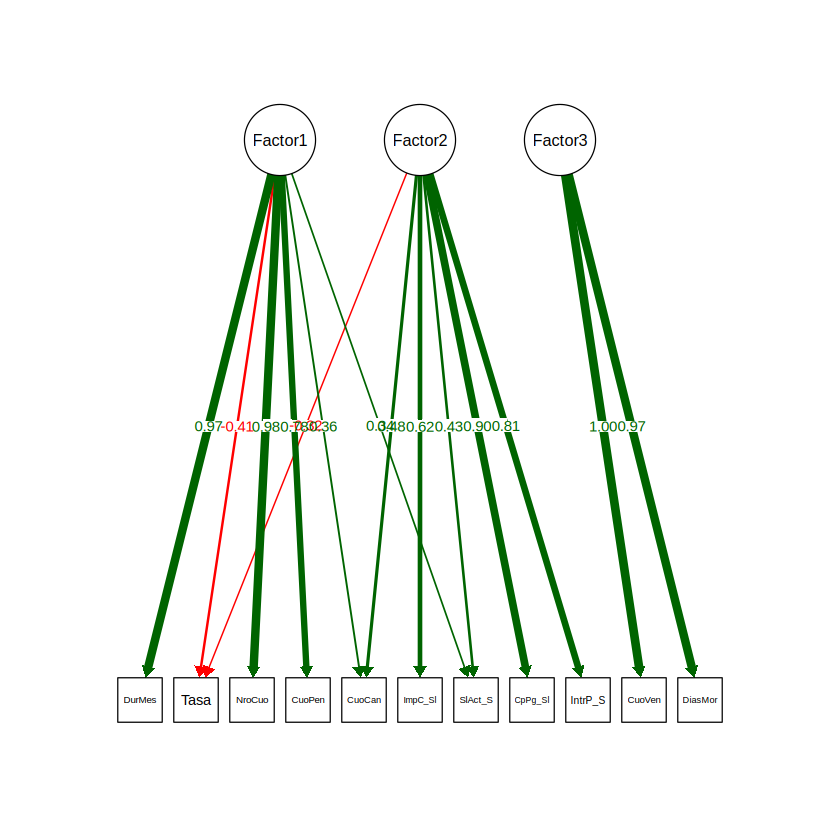

In [23]:
library(semPlot)
semPaths(Factorial, what="est", residuals=FALSE,
         cut=0.3, posCol=c("white", "darkgreen"), negCol=c("white", "red"),
         edge.label.cex=0.75, nCharNodes=7)

In [24]:
scores <- Factorial$scores %>% as.data.frame()
scores


Factor1,Factor2,Factor3
<dbl>,<dbl>,<dbl>
1.2329491,0.004974350,-0.3241953
2.0650530,5.099429479,-0.4056856
-0.7541840,-0.018887752,0.6528321
-0.4549865,1.063580394,-0.2582472
3.1427723,10.155339850,-0.4975571
1.9960994,0.704411355,1.5659652
1.2693436,-0.141684155,-0.3246818
-0.6995297,-0.169569674,-0.2355144
-0.7756296,0.210756894,-0.2359127


## Clustering


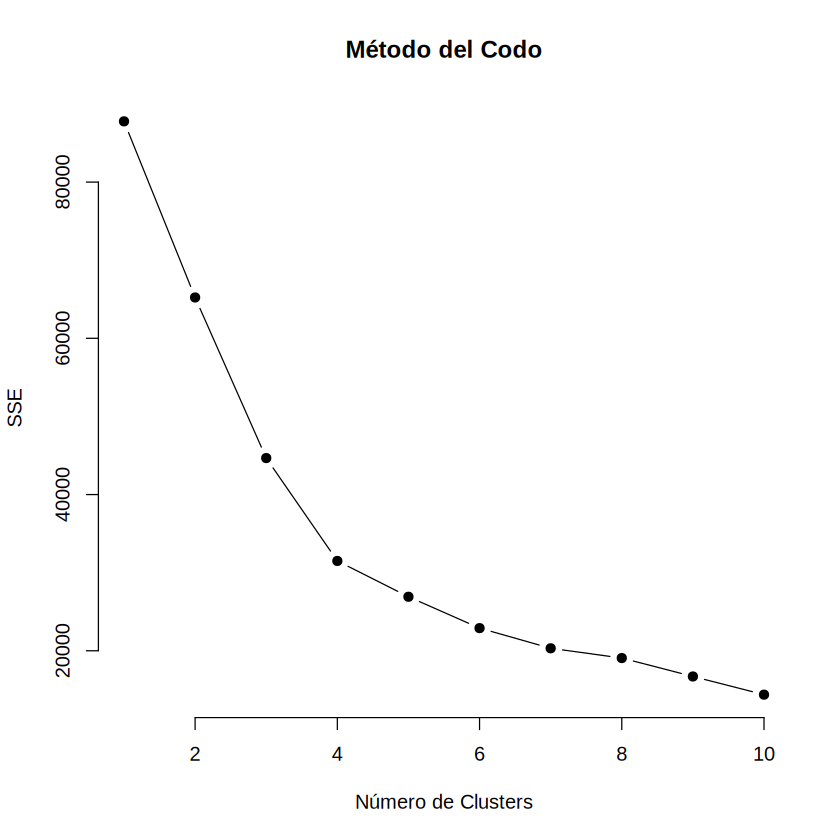

In [25]:
par(bg = "white")

wss <- sapply(1:10, function(k) {
  kmeans(scores, centers = k, nstart = 25)$tot.withinss
})
plot(1:10, wss, type = "b", pch = 19, frame = FALSE,
     xlab = "Número de Clusters", ylab = "SSE",
     main = "Método del Codo")

In [26]:
N_Cluster <- kmeans(scores,4)

In [27]:
N_Cluster$size

[1]  8177  5764 15445  1178

In [28]:
Grupos <- N_Cluster$cluster %>% as.data.frame()
colnames(Grupos) <- c("SEGMENTO")


In [29]:
Data_final <- cbind(x,scores,Grupos)
Data_final

DurMes,Tasa,NroCuo,CuoCan,CuoPen,CuoVen,DiasMora,ImpCuo_Sol,SalAct_Sol,CapPag_Sol,InterPag_Sol,Factor1,Factor2,Factor3,SEGMENTO
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1.1714598,-2.1127673,1.2035300,-0.30392287,1.68026572,-0.2735320,-0.2200883,0.90725697,1.154671276,0.054473523,0.004163405,1.2329491,0.004974350,-0.3241953,2
3.0760976,-2.0433633,2.9685918,1.48178665,2.64207518,-0.2735320,-0.2200883,5.15266342,6.018985041,4.084761998,6.767449719,2.0650530,5.099429479,-0.4056856,2
-0.7305652,-0.6552835,-0.7219920,-0.79093456,-0.15591598,0.7018773,-0.2200883,1.08351429,0.183750506,-0.265013900,-0.293718109,-0.7541840,-0.018887752,0.6528321,3
-0.2576716,-1.9739593,-0.2406115,0.02075159,-0.06847876,-0.2735320,-0.2200883,2.29810678,0.718693993,1.023455069,0.188809997,-0.4549865,1.063580394,-0.2582472,3
5.0382141,-2.2515753,5.0545740,2.94282171,4.12850799,-0.2735320,-0.2200883,5.61871404,10.790946914,8.107323798,14.998867733,3.1427723,10.155339850,-0.4975571,2
2.1224724,-2.1127673,2.1662910,3.75450785,0.54358181,1.6772865,1.5059901,-0.19175606,-0.025434836,0.918513118,0.700897576,1.9960994,0.704411355,1.5659652,2
1.2054246,-0.5164755,1.2035300,0.99477496,0.98076793,-0.2735320,-0.2200883,-0.31771642,-0.089290362,-0.110029425,0.312398213,1.2693436,-0.141684155,-0.3246818,2
-0.7410159,0.4551803,-0.7219920,-0.79093456,-0.15591598,-0.2735320,-0.2200883,0.49300186,-0.016026404,-0.313387616,-0.301504789,-0.6995297,-0.169569674,-0.2355144,3
-0.7410159,-0.6552835,-0.7219920,-0.46626010,-0.33079043,-0.2735320,-0.2200883,1.07702963,0.085854685,0.006714758,-0.132856109,-0.7756296,0.210756894,-0.2359127,3


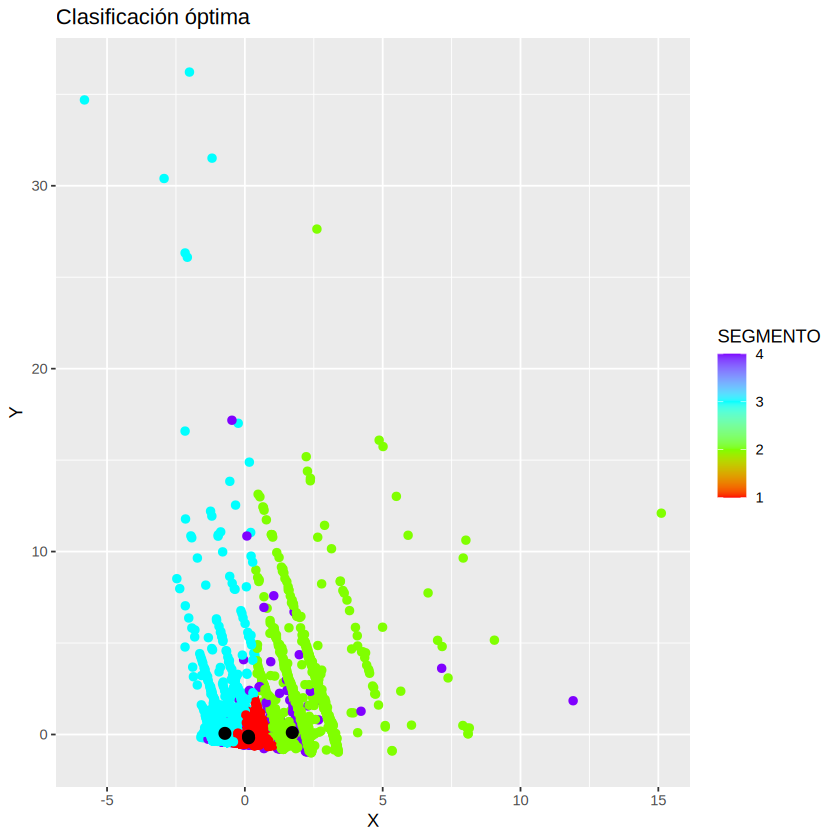

In [30]:
ggplot() + 
geom_point(aes(x = Factor1, y = Factor2, color = SEGMENTO), data = Data_final, size = 2) +

  scale_colour_gradientn(colours=rainbow(4)) +
  geom_point(aes(x = N_Cluster$centers[, 1], y = N_Cluster$centers[, 2]), color = 'black', size = 3) + 
  ggtitle("Clasificación óptima") + 
  xlab('X') + ylab('Y')

## Validacion del Modelo

In [31]:
SCI <- N_Cluster$withinss %>% as.data.frame()
colnames(SCI) <- c("SC dentro del cluster")

SCE <- N_Cluster$betweenss %>% as.data.frame()
colnames(SCE) <- c("SC entre del cluster")

SCT <- N_Cluster$totss %>% as.data.frame()
colnames(SCT) <- c("SC total")

SC <- cbind(SCI,SCE,SCT)
SC

SC dentro del cluster,SC entre del cluster,SC total
<dbl>,<dbl>,<dbl>
2173.816,47283.9,87778.09
15938.254,47283.9,87778.09
14713.554,47283.9,87778.09
7668.561,47283.9,87778.09


In [32]:
library(cluster)
sil_score <- silhouette(N_Cluster$cluster, dist(scores)) 
sil_df <- as.data.frame(sil_score)
head(sil_df, 10)

,cluster,neighbor,sil_width
,<dbl>,<dbl>,<dbl>
1,2,1,0.08568672
2,2,1,0.08134888
3,3,1,0.26293360
4,3,1,0.16311250
5,2,1,0.05217304
6,2,1,0.14836412
7,2,1,0.13976625
8,3,1,0.54528660
9,3,1,0.54554580


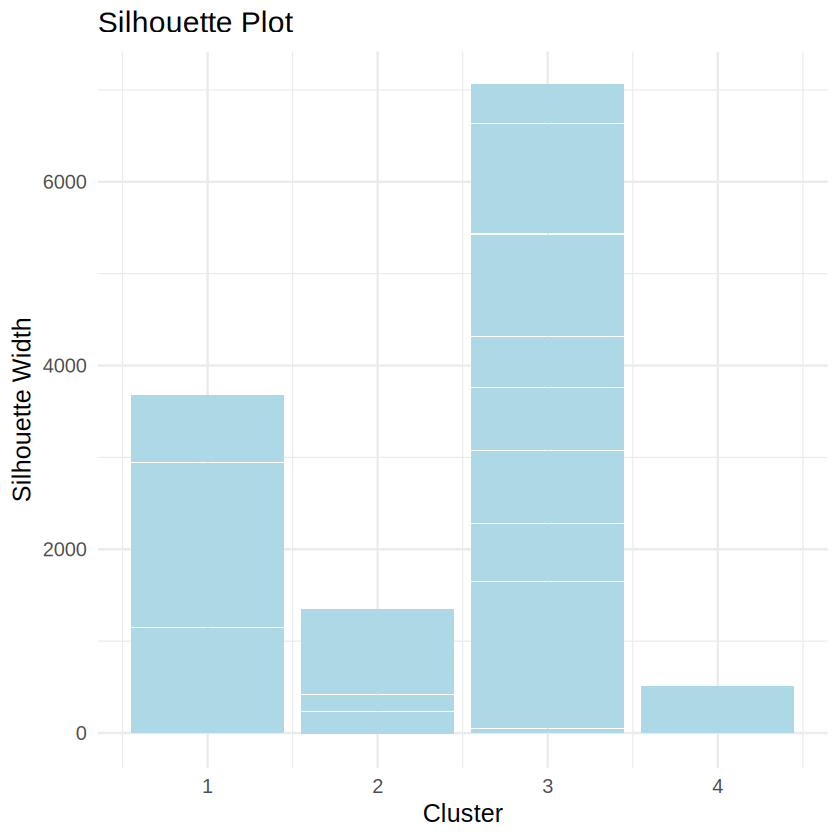

In [33]:

ggplot(sil_df, aes(x = cluster, y = sil_width)) +
  geom_bar(stat = "identity", fill = "lightblue") +
  theme_minimal(base_size = 15) +
  theme(panel.background = element_rect(fill = "white", color = "white")) +
  labs(title = "Silhouette Plot", x = "Cluster", y = "Silhouette Width")

In [34]:
Tabla_1 <- table(Data_final$SEGMENTO) %>% as.data.frame()
Tabla_2 <- prop.table(table(Data_final$SEGMENTO)) %>% as.data.frame()
Tabla_2

Var1,Freq
<fct>,<dbl>
1,0.26753697
2,0.18858788
3,0.50533307
4,0.03854208


In [35]:
Resultados_0 <- cbind(Tabla_1$Var1,Tabla_1$Freq,Tabla_2$Freq) %>% as.data.frame()
colnames(Resultados_0) <- c("Segmentos","Frec","Porcentaje")


In [36]:
Resultados_0

Segmentos,Frec,Porcentaje
<dbl>,<dbl>,<dbl>
1,8177,0.26753697
2,5764,0.18858788
3,15445,0.50533307
4,1178,0.03854208


## Análisis discriminante lineal

In [37]:

library(MASS)
lda_model <- lda(SEGMENTO ~ Factor1 + Factor2 + Factor3, data = Data_final)
lda_model


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




Call:
lda(SEGMENTO ~ Factor1 + Factor2 + Factor3, data = Data_final)

Prior probabilities of groups:
         1          2          3          4 
0.26753697 0.18858788 0.50533307 0.03854208 

Group means:
     Factor1     Factor2    Factor3
1  0.1365985 -0.18016220 -0.1727400
2  1.7194039  0.10733588 -0.2262842
3 -0.7238778  0.06244482 -0.1439461
4  0.1296110 -0.09334292  4.1935859

Coefficients of linear discriminants:
                LD1         LD2          LD3
Factor1  2.47378990  0.08923196  0.005825325
Factor2 -0.04872453 -0.04957929 -1.070570581
Factor3 -0.11878367  1.85623876 -0.024536310

Proportion of trace:
   LD1    LD2    LD3 
0.6742 0.3239 0.0019 

In [38]:
predictions <- predict(lda_model)$class

# Matriz de confusión
table(Real = Data_final$SEGMENTO, Predicho = predictions)


    Predicho
Real     1     2     3     4
   1  6835     1  1341     0
   2    91  5667     6     0
   3    53     0 15392     0
   4     0    54     0  1124

In [39]:
library(caret)

# Calcular la precisión
confusionMatrix(as.factor(predictions), as.factor(Data_final$SEGMENTO))


Loading required package: lattice



Confusion Matrix and Statistics

          Reference
Prediction     1     2     3     4
         1  6835    91    53     0
         2     1  5667     0    54
         3  1341     6 15392     0
         4     0     0     0  1124

Overall Statistics
                                          
               Accuracy : 0.9494          
                 95% CI : (0.9469, 0.9518)
    No Information Rate : 0.5053          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9191          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 4
Sensitivity            0.8359   0.9832   0.9966  0.95416
Specificity            0.9936   0.9978   0.9109  1.00000
Pos Pred Value         0.9794   0.9904   0.9195  1.00000
Neg Pred Value         0.9431   0.9961   0.9962  0.99817
Prevalence             0.2675   0.1886   0.5053  0.03854


In [40]:
lda_model$scaling


,LD1,LD2,LD3
Factor1,2.47378990,0.08923196,0.005825325
Factor2,-0.04872453,-0.04957929,-1.070570581
Factor3,-0.11878367,1.85623876,-0.024536310


In [41]:
lda_predictions <- predict(lda_model)

lda_data <- data.frame(lda_predictions$x)  # Las proyecciones de los datos en el espacio de los discriminantes
lda_data$cluster <- factor(N_Cluster$cluster) 
lda_data

,LD1,LD2,LD3,cluster
,<dbl>,<dbl>,<dbl>,<fct>
1,3.0883238,-0.4920120,9.811492e-03,2
2,4.9082289,-0.8216067,-5.437316e+00,2
3,-1.9423182,1.1454514,-1.907857e-04,3
4,-1.1466878,-0.5726994,-1.134952e+00,3
5,7.3388460,-1.1466435,-1.084149e+01,2
6,4.7175972,3.0499970,-7.809172e-01,2
7,3.1855597,-0.4823963,1.670437e-01,2
8,-1.6942521,-0.4911842,1.832400e-01,3
9,-1.9009912,-0.5175705,-2.243600e-01,3


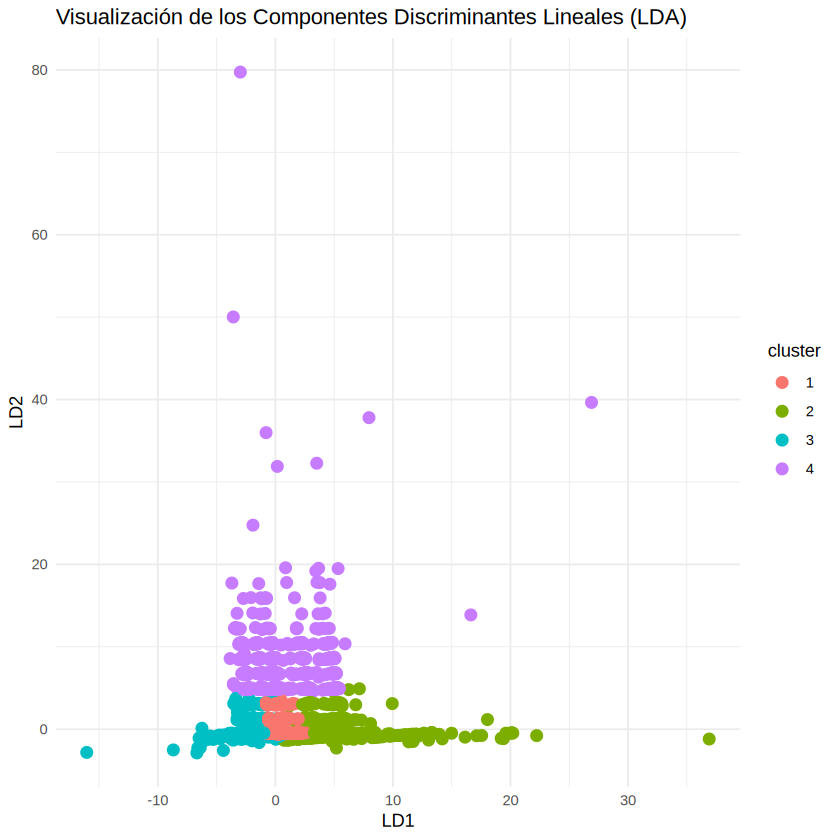

In [42]:

library(ggplot2)
ggplot(lda_data, aes(x = LD1, y = LD2, color = cluster)) +
  geom_point(size = 3) +
  labs(title = "Visualización de los Componentes Discriminantes Lineales (LDA)",
       x = "LD1", y = "LD2") +
  theme_minimal() 


In [43]:
resumen_clusters <- Data_final %>%
  group_by(SEGMENTO) %>%
  summarise(across(everything(), list(media = ~mean(.x, na.rm = TRUE))))

resumen_clusters

SEGMENTO,DurMes_media,Tasa_media,NroCuo_media,CuoCan_media,CuoPen_media,CuoVen_media,DiasMora_media,ImpCuo_Sol_media,SalAct_Sol_media,CapPag_Sol_media,InterPag_Sol_media,Factor1_media,Factor2_media,Factor3_media
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.09285294,0.0299420,0.09215153,-0.12703346,0.1301664,-0.1678438,-0.1705307,-0.166053300,-0.0413834427,-0.16754461,-0.10099194,0.1365985,-0.18016220,-0.1727400
2,1.69390310,-0.7770487,1.70178052,0.68626663,1.3021650,-0.1469522,-0.1579195,0.069701576,0.5051364530,0.26268728,0.51302008,1.7194039,0.10733588,-0.2262842
3,-0.69879112,0.2622052,-0.70330194,-0.18607729,-0.5931644,-0.1759595,-0.1730691,0.061411804,-0.1665606596,-0.00237164,-0.14041308,-0.7238778,0.06244482,-0.1439461
4,0.22912812,0.1564639,0.25459473,-0.03643852,0.5020157,4.1911597,4.2255771,0.006411414,-0.0005812533,-0.09124554,0.03178559,0.1296110,-0.09334292,4.1935859


### **Interpretación de los Clusters**

#### **Segmento 1:**
- Presenta valores negativos en casi todas las variables, indicando un comportamiento por debajo del promedio general (en el espacio estandarizado).
- Este grupo podría representar clientes con menor actividad o riesgo más bajo.

#### **Segmento 2:**
- Tiene valores positivos muy altos en variables como `DurMes_media`, `ImpCuo_Sol_media`, y `SalAct_Sol_media`.
- Esto podría representar a clientes con compromisos financieros más grandes y con capacidad de pago alta (`CapPag_Sol_media` positiva).
- Sin embargo, la tasa negativa (`Tasa_media`) sugiere condiciones favorables.

#### **Segmento 3:**
- Similar al segmento 2 pero con menor intensidad en las variables financieras.
- Podría representar un grupo intermedio.

#### **Segmento 4:**
- Tiene un comportamiento destacado en `CuoVen_media` y `CuoPen_media` (valores altos).
- Esto sugiere un enfoque en clientes con más transacciones o historial de pago reciente.
